In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [23]:
df_atack_1 = pd.read_csv('atacantes_mais_valorizados.csv').drop(['Unnamed: 0'], axis = 1)
df_atack_2 = pd.read_csv('atacantes_menos_valorizados.csv').drop(['Unnamed: 0'], axis = 1)
df_def = pd.read_csv('zagueiros.csv')

## Clusterizando os atacantes

### Mais Valorizados

#### Selecionando as Features

In [62]:
df_atack_1.columns

Index(['Jogador', 'Equipe', 'Minutos jogados:', 'Golos', 'Assistências',
       'Duelos ganhos, %', 'Altura', 'Duelos defensivos ganhos, %',
       'Duelos aéreos ganhos, %', 'Interseções/90',
       'Golos sem ser por penálti', 'Golos esperados/90', 'Golos de cabeça',
       'Golos de cabeça/90', 'Remate', 'Remates à baliza, %',
       'Golos marcados, %', 'Cruzamentos certos, %',
       'Cruzamentos precisos do flanco esquerdo, %',
       'Cruzamentos precisos do flanco direito, %', 'Dribles/90',
       'Dribles com sucesso, %', 'Duelos ofensivos ganhos, %',
       'Passes certos, %', 'Passes para a frente certos, %',
       'Passes para trás certos, %', 'Passes laterais certos, %',
       'Passes curtos / médios precisos, %', 'Passes longos certos, %',
       'Passes inteligentes certos, %', 'Passes certos para terço final, %',
       'Passes precisos para a área de penálti, %',
       'Passes em profundidade certos, %', 'Passes progressivos certos, %'],
      dtype='object')

In [74]:
X = df_atack_1[['Minutos jogados:', 
       'Golos', 
       'Assistências', 
       'Duelos ganhos, %',
       'Altura', 
       'Duelos defensivos ganhos, %', 
       'Duelos ofensivos ganhos, %',
       'Duelos aéreos ganhos, %',
       'Interseções/90', 
       'Golos sem ser por penálti', 
       'Golos esperados/90',
       'Golos de cabeça', 
       'Golos de cabeça/90', 
       'Remate',
       'Passes para a frente certos, %',
       'Passes para trás certos, %'
      ]].dropna()

In [76]:
for i in X.columns:
  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [77]:
X.head()

,Minutos jogados:,Golos,Assistências,"Duelos ganhos, %",Altura,"Duelos defensivos ganhos, %","Duelos ofensivos ganhos, %","Duelos aéreos ganhos, %",Interseções/90,Golos sem ser por penálti,Golos esperados/90,Golos de cabeça,Golos de cabeça/90,Remate,"Passes para a frente certos, %","Passes para trás certos, %"
0,0.844302,0.487179,0.615385,0.591588,0.870,0.483731,0.744974,0.539102,0.463068,0.516129,0.573171,0.0,0.000000,0.829787,0.993918,0.795380
1,0.365948,0.256410,0.307692,0.275831,0.875,0.548241,0.425820,0.526522,0.593750,0.258065,0.719512,0.2,0.266667,0.351064,0.777609,0.644464
2,0.366142,0.282051,0.846154,0.508077,0.875,0.405032,0.616931,0.340020,0.181818,0.322581,0.475610,0.0,0.000000,0.313830,0.856301,0.815482
3,0.333722,0.153846,0.153846,0.183176,0.920,0.591563,0.327619,0.459538,0.301136,0.193548,0.402439,0.3,0.433333,0.250000,0.424444,0.624962
4,0.421860,0.333333,0.153846,0.527278,0.910,0.585131,0.556825,0.788167,0.647727,0.290323,0.402439,0.2,0.233333,0.367021,0.618514,0.788179


In [85]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

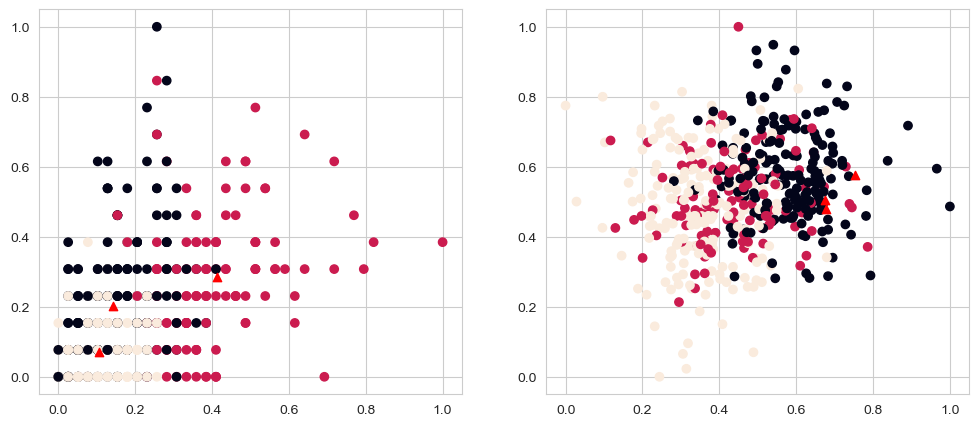

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X['Golos'],X['Assistências'],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    plt.scatter(center[1],center[2],marker = '^',c = 'red')

     
plt.subplot(1,2,2)   
plt.scatter(X['Duelos ofensivos ganhos, %'],X['Duelos defensivos ganhos, %'],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    plt.scatter(center[len(center)-1],center[5],marker = '^',c = 'red')
plt.show()

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


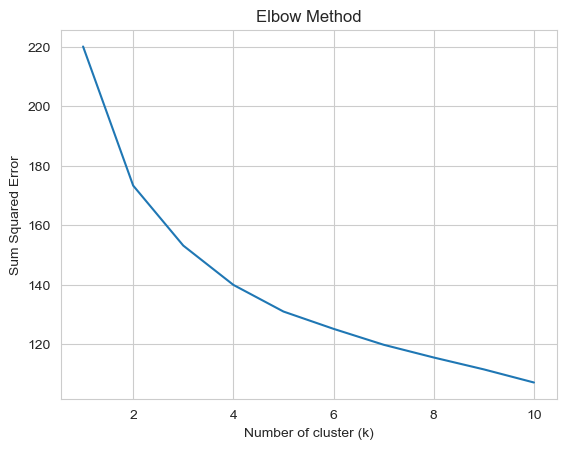

In [82]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [88]:
df_atack_1['cluster'] = pred

#### Filtrando as Classes desejadas

In [90]:
df_atack_1[df_atack_1['cluster'] == 0].head()

,Jogador,Equipe,Minutos jogados:,Golos,Assistências,"Duelos ganhos, %",Altura,"Duelos defensivos ganhos, %","Duelos aéreos ganhos, %",Interseções/90,...,"Passes para trás certos, %","Passes laterais certos, %","Passes curtos / médios precisos, %","Passes longos certos, %","Passes inteligentes certos, %","Passes certos para terço final, %","Passes precisos para a área de penálti, %","Passes em profundidade certos, %","Passes progressivos certos, %",cluster
2,Neymar,Al Hilal,2292,11,11,42.60,175,47.12,20.00,0.98,...,93.85,89.32,85.91,58.24,38.81,79.76,63.03,32.95,86.54,0
4,João Pedro,Brighton,2579,13,2,43.23,182,56.64,46.36,2.62,...,92.94,77.74,81.63,53.85,34.15,63.08,52.43,26.92,80.15,0
5,Matheus Cunha,Wolverhampton Wanderers,2158,3,3,37.64,183,49.56,19.61,2.88,...,91.30,77.52,81.52,40.00,18.18,78.38,59.26,25.00,66.00,0
13,Talles Magno,New York City,2179,6,3,39.76,185,64.37,28.38,1.49,...,89.44,89.00,85.64,68.75,50.00,80.36,78.05,52.38,80.82,0
14,Felipe Anderson,Lazio,3851,10,7,44.60,175,61.15,27.94,3.18,...,92.64,80.09,83.05,59.72,42.86,72.64,48.87,40.00,74.23,0


### Menos Valorizados

In [92]:
df_atack_2.head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado
0,Robinho,CSA,"RW, LW, CF",24,300000,2023-12-31,24,1260,2,2.10,Brazil,Brazil,direito,176,75,sim
1,Kawê,Red Bull Bragantino,"LCMF, AMF, RWF",21,300000,2027-06-30,4,115,0,0.12,Brazil,Brazil,direito,178,66,sim
2,Júnior Todinho,CSA,"CF, RW",29,300000,2024-04-10,28,1918,6,7.06,Brazil,Brazil,esquerdo,182,72,sim
3,João Veras,Botafogo SP,"CF, RAMF",22,300000,2023-11-30,7,135,1,0.35,Brazil,Brazil,direito,182,73,sim
4,Salatiel,Botafogo SP,CF,31,300000,2023-11-30,33,2698,8,7.97,Brazil,Brazil,direito,187,76,sim


#### Selecionando as Features

In [91]:
df_atack_2.columns

Index(['Jogador', 'Equipa', 'Posição', 'Idade', 'Valor de mercado',
       'Contrato termina', 'Partidas jogadas', 'Minutos jogados:', 'Golos',
       'Golos esperados', 'Naturalidade', 'País de nacionalidade', 'Pé',
       'Altura', 'Peso', 'Emprestado'],
      dtype='object')

In [123]:
X = df_atack_2[['Idade',
                'Partidas jogadas', 
                'Minutos jogados:', 
                'Golos',
                'Golos esperados',
                'Pé',
                'Altura', 
                'Peso'
              ]].dropna()

In [125]:
X = pd.get_dummies(X)
X = X.div(X.sum(axis=1), axis='rows')

In [117]:
#for i in X.columns:
#  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [126]:
X.head()

,Idade,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Altura,Peso,Pé_ambos,Pé_direito,Pé_esquerdo
0,0.015344,0.015344,0.805575,0.001279,0.001343,0.112525,0.047951,0.0,0.000639,0.000000
1,0.054528,0.010386,0.298608,0.000000,0.000312,0.462194,0.171375,0.0,0.002597,0.000000
2,0.012929,0.012483,0.855082,0.002675,0.003147,0.081139,0.032099,0.0,0.000000,0.000446
3,0.052213,0.016613,0.320399,0.002373,0.000831,0.431945,0.173253,0.0,0.002373,0.000000
4,0.010191,0.010848,0.886925,0.002630,0.002620,0.061473,0.024984,0.0,0.000329,0.000000


In [127]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


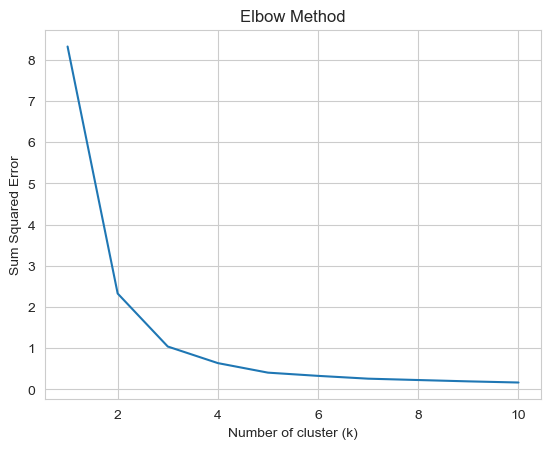

In [128]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [130]:
df_atack_2['cluster'] = pred

#### Filtrando as Classes desejadas

In [132]:
df_atack_2[df_atack_2['cluster'] == 0].head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado,cluster
0,Robinho,CSA,"RW, LW, CF",24,300000,2023-12-31,24,1260,2,2.10,Brazil,Brazil,direito,176,75,sim,0
2,Júnior Todinho,CSA,"CF, RW",29,300000,2024-04-10,28,1918,6,7.06,Brazil,Brazil,esquerdo,182,72,sim,0
4,Salatiel,Botafogo SP,CF,31,300000,2023-11-30,33,2698,8,7.97,Brazil,Brazil,direito,187,76,sim,0
5,Gabriel Bispo,KuPS,"CF, AMF",26,300000,2024-12-31,33,2019,3,6.61,Brazil,Brazil,direito,177,77,sim,0
6,Bruno Mezenga,Santos,CF,35,300000,2024-04-10,25,1432,8,3.71,Brazil,Brazil,esquerdo,185,78,sim,0


## Clusterizando os Zagueiros

In [134]:
df_def.head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado
0,Marquinhos,PSG,"RCB, LCB",29,70000000,2028-06-30,45,4117,2,1.22,Brazil,"Brazil, Portugal",direito,183,75,sim
1,Éder Militão,Real Madrid,RCB,25,70000000,2025-06-30,42,3855,6,4.88,Brazil,"Brazil, Spain",direito,186,78,sim
2,Gabriel Magalhaes,Arsenal,LCB,25,50000000,2027-06-30,51,4674,3,4.52,Brazil,Brazil,esquerdo,190,87,sim
3,Bremer,Juventus,"CB, RCB",26,40000000,2027-06-30,42,4022,4,7.26,Brazil,Brazil,direito,188,82,sim
4,Diego Carlos,Aston Villa,RCB,30,30000000,2026-06-30,11,652,0,1.36,Brazil,"Brazil, Spain",direito,185,79,sim


#### Selecionando as Features

In [136]:
df_def.columns

Index(['Jogador', 'Equipa', 'Posição', 'Idade', 'Valor de mercado',
       'Contrato termina', 'Partidas jogadas', 'Minutos jogados:', 'Golos',
       'Golos esperados', 'Naturalidade', 'País de nacionalidade', 'Pé',
       'Altura', 'Peso', 'Emprestado'],
      dtype='object')

In [137]:
X = df_def[['Idade',
                'Partidas jogadas', 
                'Minutos jogados:', 
                'Golos',
                'Golos esperados',
                'Pé',
                'Altura', 
                'Peso'
              ]].dropna()

In [138]:
X = pd.get_dummies(X)
X = X.div(X.sum(axis=1), axis='rows')

In [117]:
#for i in X.columns:
#  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [139]:
X.head()

,Idade,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Altura,Peso,Pé_ambos,Pé_direito,Pé_esquerdo
0,0.006512,0.010105,0.924500,0.000449,0.000274,0.041094,0.016842,0.0,0.000225,0.000000
1,0.005955,0.010005,0.918321,0.001429,0.001162,0.044308,0.018581,0.0,0.000238,0.000000
2,0.004965,0.010128,0.928206,0.000596,0.000898,0.037732,0.017277,0.0,0.000000,0.000199
3,0.005947,0.009606,0.919890,0.000915,0.001660,0.042998,0.018755,0.0,0.000229,0.000000
4,0.031271,0.011466,0.679620,0.000000,0.001418,0.192837,0.082347,0.0,0.001042,0.000000


In [140]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


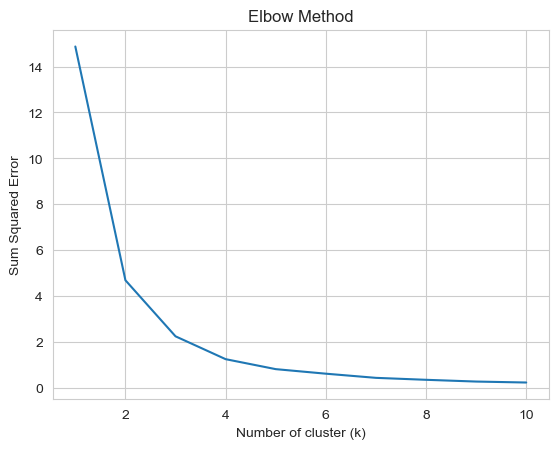

In [141]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [144]:
df_def['cluster'] = pred

#### Filtrando as Classes desejadas

In [145]:
df_def[df_def['cluster'] == 0].head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado,cluster
0,Marquinhos,PSG,"RCB, LCB",29,70000000,2028-06-30,45,4117,2,1.22,Brazil,"Brazil, Portugal",direito,183,75,sim,0
1,Éder Militão,Real Madrid,RCB,25,70000000,2025-06-30,42,3855,6,4.88,Brazil,"Brazil, Spain",direito,186,78,sim,0
2,Gabriel Magalhaes,Arsenal,LCB,25,50000000,2027-06-30,51,4674,3,4.52,Brazil,Brazil,esquerdo,190,87,sim,0
3,Bremer,Juventus,"CB, RCB",26,40000000,2027-06-30,42,4022,4,7.26,Brazil,Brazil,direito,188,82,sim,0
5,Ibañez,Al Ahli,"LCB, RCB",24,30000000,2025-06-30,46,4434,4,5.25,Brazil,"Brazil, Italy",direito,185,73,sim,0
